# Introduction to NLP

## Preprocessing text in Python

* [Reference](https://towardsdatascience.com/introduction-to-nlp-part-1-preprocessing-text-in-python-8f007d44ca96)

In [3]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Data
part1 = """We are gathered here today on this joyous occasion to celebrate the special love that Monica and Chandler share. It is a love based on giving and receiving as well as having and sharing. And the love that they give and have is shared and received. And
through this having and giving and sharing and receiving, we too can share and love and have... and receive."""

part2 = """When I think of the love these two givers and receivers share I cannot help but envy the lifetime ahead of having and loving and giving and receiving."""

# Create a dataframe
X_train = pd.DataFrame([part1, part2], columns=['speech'])

In [5]:
# Text preprocessing function to pass on a Tfidf Vectorizer
def preprocess_text(text):
    # Tokenize words with ignoring punctuation
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Lowercase and lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]

    # Remove stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stopwords.words('english')]

    return keywords

In [6]:
# Preprocess the datas

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=preprocess_text)

# Fit the data and transform to feature matrix
X_train = vectorizer.fit_transform(X_train['speech'])

# Convert sparse matrix to Dataframe
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

# Save mappings on which index refers to which words
col_map = {v:k for k,v in vectorizer.vocabulary_.items()}

# Rename each column using mapping
for col in X_train.columns:
    X_train.rename(columns={col: col_map[col]}, inplace=True)
X_train

,ahead,base,cannot,celebrate,chandler,envy,gather,give,givers,help,...,monica,occasion,receive,receivers,share,special,think,today,two,well
0,0.00000,0.151773,0.00000,0.151773,0.151773,0.00000,0.151773,0.323963,0.00000,0.00000,...,0.151773,0.151773,0.431951,0.00000,0.539939,0.151773,0.00000,0.151773,0.00000,0.151773
1,0.28235,0.000000,0.28235,0.000000,0.000000,0.28235,0.000000,0.200894,0.28235,0.28235,...,0.000000,0.000000,0.200894,0.28235,0.200894,0.000000,0.28235,0.000000,0.28235,0.000000


## Difference between lemmatisation and stemming

* [Reference](https://towardsdatascience.com/introduction-to-nlp-part-2-difference-between-lemmatisation-and-stemming-3789be1c55bc)

“Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes….Stemmers use language-specific rules, but they require less knowledge than a lemmatizer…”

💡 “Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma….a lemmatizer, which needs a complete vocabulary and morphological analysis to correctly lemmatize words…”

In [7]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

In [8]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [12]:
# Function that normalises text using the three normalizers
def normalise_text(words, pos='v'):
    """Stem and lemmatise each word in a list. Return output in a dataframe."""
    normalised_text = pd.DataFrame(index=words, columns=['Porter', 'Lancaster', 'Lemmatiser'])
    for word in words:
        normalised_text.loc[word, 'Porter'] = porter.stem(word)
        normalised_text.loc[word, 'Lancaster'] = lancaster.stem(word)
        normalised_text.loc[word, 'Lemmatiser'] = lemmatizer.lemmatize(word, pos=pos)
    return normalised_text

In [14]:
# Start with 10 arbitrary nouns
nt = normalise_text(['apples', 'pears', 'tasks', 'children', 'earrings', 'dictionary', 'marriage', 'connections', 'universe', 'university'], pos='n')
# nt

In [15]:
# Try with some words that ends with an 'e''
ne = normalise_text(['pie', 'globe', 'house', 'knee', 'angle', 'acetone', 'time', 'brownie', 'climate', 'independence'], pos='n')

In [17]:
# Try with some verbs
nt_v = normalise_text(['wrote', 'thinking', 'remembered', 'relies', 'ate', 'gone', 'won', 'ran', 'swimming', 'mistreated'], pos='v')

### Two tips for effective lemmatization

In [19]:
# Part-of-speech tag (POS)

"""The part-of-speech tag provides the context of the word to the lemmatiser.
In the example, n is noun and v is verb"""

lemmatiser = WordNetLemmatizer()
print(f"Lemmatising 'remembered' with pos='v' results in: {lemmatiser.lemmatize('remembered', 'v')}")
print(f"Lemmatising 'remembered' with pos='n' results in: {lemmatiser.lemmatize('remembered', 'n')}\n")
print(f"Lemmatising 'universities' with pos='v' results in: {lemmatiser.lemmatize('universities', 'v')}")
print(f"Lemmatising 'universities' with pos='n' results in: {lemmatiser.lemmatize('universities', 'n')}")

Lemmatising 'remembered' with pos='v' results in: remember
Lemmatising 'remembered' with pos='n' results in: remembered

Lemmatising 'universities' with pos='v' results in: universities
Lemmatising 'universities' with pos='n' results in: university


In [20]:
# Case

"""When capitalised, words remain unchanged even with the correct pos because they are viewed as proper nouns."""

print(f"Lemmatising 'Remembered' with pos='v' results in: {lemmatiser.lemmatize('Remembered', 'v')}")
print(f"Lemmatising 'Remembered' with pos='n' results in: {lemmatiser.lemmatize('Remembered', 'n')}\n")
print(f"Lemmatising 'Universities' with pos='v' results in: {lemmatiser.lemmatize('Universities', 'v')}")
print(f"Lemmatising 'Universities' with pos='n' results in: {lemmatiser.lemmatize('Universities', 'n')}")


Lemmatising 'Remembered' with pos='v' results in: Remembered
Lemmatising 'Remembered' with pos='n' results in: Remembered

Lemmatising 'Universities' with pos='v' results in: Universities
Lemmatising 'Universities' with pos='n' results in: Universities


## TF-IDF Explained

In [21]:
d1 = 'I thought, I thought of thinking of thanking you for the gift'
d2 = 'She was thinking of going to go and get you a GIFT!'

In [26]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a dataframe
X_train = pd.DataFrame({'text': [d1, d2]})

In [23]:
def preprocess_text(text):
    # tokenize works ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)

    # lowercase and lemmatise
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]

    # remove stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords


In [30]:
### Vectorize using TfidfVectorizer
vectoriser = TfidfVectorizer(analyzer=preprocess_text)

# Fit to data and transform to feature matrix
X_train = vectoriser.fit_transform(X_train['text'])

# Convert sparse matrix to dataframe
X_train = pd.DataFrame.sparse.from_spmatrix(X_train)

# Save mapping on which index refer to each word
col_map = {v:k for k,v in vectoriser.vocabulary_.items()}

# Rename each column using the mapping
for col in X_train.columns:
    X_train.rename(columns={col: col_map[col]}, inplace=True)

In [31]:
X_train

,get,gift,go,thank,think
0,0.000000,0.288972,0.000000,0.40614,0.866917
1,0.407824,0.290170,0.815648,0.00000,0.290170


In [32]:
# Now lets transform some unseen documents
d3 = 'He thinks he will go!'
d4 = 'They don’t know what to buy!'

# Create dataframe
X_test = pd.DataFrame({'test': [d3, d4]})

# Transform to feature matrix
X_test = vectoriser.transform(X_test['test'])

# Convert the sparse matrix to dataframe
X_test = pd.DataFrame.sparse.from_spmatrix(X_test)

# Add column name to make it more reliable
for col in X_test.columns:
    X_test.rename(columns={col: col_map[col]}, inplace=True)

In [33]:
X_test

,get,gift,go,thank,think
0,0.0,0.0,0.814802,0.0,0.579739
1,0.0,0.0,0.000000,0.0,0.000000


## Part 5A | Unsupervised topic model in Python

* [Reference](https://towardsdatascience.com/introduction-to-nlp-part-5a-unsupervised-topic-model-in-python-733f76b3dc2d)

In [58]:
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', context='talk')
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.sklearn

import numpy as np

# Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Stopwords
stop_words = set(ENGLISH_STOP_WORDS).union(stopwords.words('english'))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 'shall'])
print(f"Number of stop words: {len(stop_words)}")

Number of stop words: 383


In [42]:
# Warm-up example
data = ["We played board games yesterday.",
        "Delicious mango!",
        "She plays board games every weekend.",
        "Mangoes are now in season. Buy them while they are cheap."]
example = pd.DataFrame({'document': data})

In [44]:
# Convert to document-term matrix
vectoriser = CountVectorizer(stop_words='english')
example_matrix = vectoriser.fit_transform(example['document'])

# Extract feature/term names
features_names = vectoriser.get_feature_names()

In [45]:
# Inspect document/term matrix
pd.DataFrame.sparse.from_spmatrix(example_matrix, columns=features_names)

,board,buy,cheap,delicious,games,mango,mangoes,played,plays,season,weekend,yesterday
0,1,0,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,0,1,0,0


In [50]:
# Normalize words that mango/mangoes look the same
def preprocess_text(document):
    """Preprocess document into normalised tokens."""
    # Tokenise words into alphabetic tokens with minimum length of 3
    tokeniser = RegexpTokenizer(r'[A-Za-z]{3,}')
    tokens = tokeniser.tokenize(document) 

    # Tag words with POS tag
    pos_map = {'J': 'a', 'N': 'n', 'R': 'r', 'V': 'v'}
    pos_tags = pos_tag(tokens)

    # Lowercase and lemmatize
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(t.lower(), pos=pos_map.get(p[0], 'v')) for t, p in pos_tags]

    # Remove stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

In [56]:
# Convert to document/term matrix
vectoriser = CountVectorizer(analyzer=preprocess_text)
example_matrix = vectoriser.fit_transform(example['document'])

# Extract feature/term names
feature_names = vectoriser.get_feature_names()

# Inspect document-term matrix
pd.DataFrame.sparse.from_spmatrix(example_matrix, columns=features_names)

,board,buy,cheap,delicious,game,mango,play,season,weekend,yesterday
0,1,0,0,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,1,0,1,0,1,0
3,0,1,1,0,0,1,0,1,0,0


* Okay, our data is in a state that models can understand, so let’s build a simple model
* When building a model, we need to define the number of topics to the n_components parameter

In [54]:
# Build LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit(example_matrix)

# Inspect topics
def describe_topics(lda, feature_names, top_n_words=5, show_weight=False):
    """Print top n words for each topic from lda model."""
    normalised_weights = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis] 

    for i, weights in enumerate(normalised_weights):
        print(f'********* Topic {i+1} **********)')
        if show_weight:
            feature_weights = [*zip(np.round(weights, 4), feature_names)]
            feature_weights.sort(reverse=True)
            print(feature_weights[:top_n_words], '\n')
        else:
            top_words = [feature_names[i] for i in weights.argsort()[:-top_n_words-1:-1]]
            print(top_words, '\n')

In [59]:
describe_topics(lda, feature_names, show_weight=True)

********* Topic 1 **********)
[(0.2266, 'mango'), (0.1359, 'season'), (0.1359, 'cheap'), (0.1359, 'buy'), (0.1355, 'delicious')] 

********* Topic 2 **********)
[(0.1919, 'play'), (0.1919, 'game'), (0.1919, 'board'), (0.1149, 'yesterday'), (0.1149, 'weekend')] 



In [62]:
# Assign probability of each topic to the documents
example[['topic1', 'topic2']] = lda.transform(example_matrix)
# example

In [64]:
# Great, we will now identify the dominant topic by finding the topic with the highest probability for each record
example['top'] = example.iloc[:, 1:3].idxmax(axis=1)
example['prob'] = example.iloc[:, 1:3].max(axis=1)

In [66]:
# Lets give topic some names
topic_mapping = {'topic1': 'mango', 'topic2': 'board game'}
example['topic'] = example['top'].map(topic_mapping)

In [67]:
# Assign topic to new documents
def assign_topic(document):
    """Assign topic to a document using lda model prediction."""
    tokens = vectoriser.transform(pd.Series(document))
    probabilities = lda.transform(tokens)
    topic = probabilities.argmax()
    topic_name = topic_mapping['topic'+str(topic+1)]
    return topic_name

In [68]:
assign_topic("Board games are so fun!")

'board game'

In [ ]:
# TO BE CONTINUED....

## Part 5B | Unsupervised topic model in Python

* [Reference](https://towardsdatascience.com/introduction-to-nlp-part-5b-unsupervised-topic-model-in-python-ab04c186f295)

In [77]:
# Dataset
from sklearn.datasets import fetch_20newsgroups# Data manipulation
import numpy as np
import pandas as pd
from collections import defaultdict
pd.options.display.max_colwidth = 100

In [79]:
# Text preprocessing and modelling
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.model_selection import train_test_split
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

In [80]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim

In [81]:
# Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)# Stopwords
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
print(f"Number of stop words: {len(stop_words)}")

Number of stop words: 395


In [84]:
example = ["We played board games yesterday.",
           "Mangos are delicious!",
           "She plays board games every weekend.",
           "Mangoes are now in season. Buy them while they are cheap."]
example

['We played board games yesterday.',
 'Mangos are delicious!',
 'She plays board games every weekend.',
 'Mangoes are now in season. Buy them while they are cheap.']

In [85]:
# An warm-up example
def preprocess_text(text, stop_words, pos_to_keep=None):
    """Preprocess document into normalised tokens."""
    # Tokenise into alphabetic tokens with minimum length of 3
    tokeniser = RegexpTokenizer(r'[A-Za-z]{3,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and tag words with POS tag
    tokens_lower = [token.lower() for token in tokens]
    pos_map = {'J': 'a', 'N': 'n', 'R': 'r', 'V': 'v'}
    pos_tags = pos_tag(tokens_lower)
    
    # Keep tokens with relevant pos
    if pos_to_keep is not None:
        pos_tags =  [token for token in pos_tags if token[1][0] in pos_to_keep]  
    
    # Lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(t, pos=pos_map.get(p[0], 'v')) for t, p in pos_tags]
    
    # Remove stopwords
    keywords = [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords
documents = [preprocess_text(document, stop_words) for document in example]
documents

[['play', 'board', 'game', 'yesterday'],
 ['mango', 'delicious'],
 ['play', 'board', 'game', 'weekend'],
 ['mango', 'season', 'buy', 'cheap']]

In [86]:
# Now the documents are preprocessed, let’s create a Gensim Dictionary object. It will map each unique word in the corpus to a numeric id as shown below
id2word = Dictionary(documents)
id2word.token2id

{'board': 0,
 'game': 1,
 'play': 2,
 'yesterday': 3,
 'delicious': 4,
 'mango': 5,
 'weekend': 6,
 'buy': 7,
 'cheap': 8,
 'season': 9}

In [87]:
# We can see word: word id pairs in this output. For instance, word id = 5 represents ‘mango’. Using the dictionary, we can transform the preprocessed documents into numerical representation:
corpus = [id2word.doc2bow(document) for document in documents]
print(corpus[0])
# Here, we see (word id, word count) pairs for each unique word in the first document. In other words, the output is saying the first document contains:
# [1 x ‘board’, 1 x ‘game’, 1 x ‘play’, 1 x ‘yesterday’]


[(0, 1), (1, 1), (2, 1), (3, 1)]


In [88]:
# Build a simple model with 2 topics
num_topics = 2
lda = LdaModel(corpus=corpus, id2word=id2word, 
               num_topics=num_topics, passes=20, 
               random_state=0)
for i in range(num_topics):
    print(f"********** Topic {i+1} **********")
    print(lda.print_topic(i, topn=5), '\n')

********** Topic 1 **********
0.186*"play" + 0.186*"game" + 0.186*"board" + 0.111*"weekend" + 0.111*"yesterday" 

********** Topic 2 **********
0.231*"mango" + 0.141*"delicious" + 0.130*"buy" + 0.130*"cheap" + 0.129*"season" 



In [93]:
# Now lets find the most dominant topic per each document
topic_mapping = { 1: 'Board game', 2: 'Mango'}

def assign_topic(document):
    """Assign a topic to a document"""
    # Preprocess document
    tokens = preprocess_text(document, stop_words)
    corpus = id2word.doc2bow(tokens)

    # Predict probabilities
    topics = lda[corpus]
    topics.sort(key=lambda x: x[1], reverse=True)

    # Extract the topic
    topic = topics[0]
    return topic_mapping[topic[0] + 1], topic[1]

In [94]:
for document in example:
    print(document)
    print(assign_topic(document), '\n')

We played board games yesterday.
('Board game', 0.8964855) 

Mangos are delicious!
('Mango', 0.8288173) 

She plays board games every weekend.
('Board game', 0.89648706) 

Mangoes are now in season. Buy them while they are cheap.
('Mango', 0.8946325) 



In [95]:
assign_topic("Board games are so fun!")

('Board game', 0.82870585)

### Realistic example

In [98]:
# Load data for a subset of categories
categories = ['comp.sys.mac.hardware', 'rec.sport.baseball', 
              'alt.atheism']
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 
                                        'quotes'), 
                                categories=categories)

In [100]:
df = pd.DataFrame(newsgroups['data'], columns=['document'])
print("Shape:", df.shape)
df.head()

Shape: (1655, 1)


,document
0,\nthis borders on blasphemy.
1,"\n\tNo, no no. The Ack man is apparently an alien life-form, much\nlike the pod people from plan..."
2,\nThat's rich... Ozzie Smith a defensive liability...
3,"\nYes, this is also my understanding of the majority of Islamic laws.\nHowever, I believe there ..."
4,\nClemens is going on his normal four days' rest (last pitched Saturday). \nHesketh only pitched...


In [101]:
# Looking at character length of documents will give an indication of too short documents.
df['n_characters'] = df['document'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_characters,1655.0,813.080363,2304.888921,0.0,196.0,407.0,807.0,50957.0


In [102]:
# Check how under 20 characters document look like
df.query("n_characters<20").sort_values('n_characters', ascending=False)

,document,n_characters
670,*thud*\n\n(see .sig)\n,19
1151,this is a test\n \n,17
352,with\nmodel\ntoward,17
1183,Rawley Eastwick\n,16
1172,\n\n\n\n\n Anaheim.,16
...,...,...
528,,0
527,,0
1020,,0
436,,0


In [103]:
# Exclude short documents
df.query("n_characters>=20", inplace=True)
df.nsmallest(5, 'n_characters')

,document,n_characters
36,\nThey did. For $950K.,22
258,Dave Kingman is Jewish,22
1341,Farr's ERA is in the\n,22
11,Article from as follows\n,24
493,"First game, first at bat.",25


In [104]:
# Usually, many consider partitioning dataset in unsupervised modelling has little value as there is no target to check against. However, I think it would be good to set aside a handful of unseen test documents to sense check the model later.
X_train, X_test = train_test_split(df['document'], test_size=5, 
                                   random_state=1)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1578,)
Test size: (5,)


In [105]:
# Let’s transform the training documents into numerical representation.

# Process documents
documents = [preprocess_text(document, stop_words) for document in X_train]
print('First document: ', documents[0], '\n')

# Create word id mappings
id2word = Dictionary(documents)
id2word.filter_extremes(no_below=5)
print('Number of unique words: ' + str(len(id2word.token2id.keys())), '\n')

# Transform documents to numbers
corpus = [id2word.doc2bow(document) for document in documents]
print('First document: ', corpus[0])

First document:  ['hello', 'know', 'place', 'case', 'hold', 'power', 'supply', 'motherboard', 'quadra', 'know', 'try', 'mail', 'order', 'place', 'local', 'store', 'group', 'prefer', 'case', 'eye', 'comment', 'currently', 'gut', 'email', 'post', 'group', 'info'] 



TypeError: can only concatenate str (not "int") to str

* To be more practical, let’s pretend we don’t know the number of topics and we will attempt to find the suitable number of topics with manual grid search
* We will manually test a range of different topic numbers and assess them based on their coherence score
* If you have an intuitive guess on the rough range of topics, one way to narrow down the options is to run manual grid search
* However, take output of grid search as a guide only and check if the topics make sense.

In [108]:
def compute_coherence(num_topics):
    """Compute coherence score given a number of topics."""
    lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics,
        passes=20, random_state=0)
    cm = CoherenceModel(model=lda, texts=documents, dictionary=id2word, coherence='c_v')
    return cm.get_coherence()

In [109]:
# Código demora muito para executar
coherence = pd.DataFrame(index=range(2,6), columns=['coherence'])
for i in coherence.index:
    c = compute_coherence(i)
    coherence.loc[i, 'coherence'] = c

In [110]:
# The higher the c_v coherence score, the better. We can see that the model with 3 topics has the highest coherence score
coherence

,coherence
2,0.396056
3,0.598742
4,0.575814
5,0.567083


In [112]:
# Lets run an LDA model with 3 topics now
num_topics = 3
lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=20,
    random_state=0)
for i in range(num_topics):
    print(f"********** Topic {i+1} **********")
    print(lda.print_topic(i), '\n')

********** Topic 1 **********
0.015*"god" + 0.012*"people" + 0.010*"think" + 0.008*"atheist" + 0.008*"believe" + 0.008*"know" + 0.007*"argument" + 0.007*"religion" + 0.007*"atheism" + 0.006*"thing" 

********** Topic 2 **********
0.017*"mac" + 0.016*"use" + 0.012*"drive" + 0.012*"apple" + 0.010*"problem" + 0.008*"work" + 0.008*"know" + 0.008*"card" + 0.007*"like" + 0.006*"bit" 

********** Topic 3 **********
0.017*"year" + 0.015*"game" + 0.013*"win" + 0.012*"good" + 0.011*"team" + 0.010*"run" + 0.009*"think" + 0.009*"player" + 0.008*"hit" + 0.006*"like" 



In [113]:
# Let’s add the topic probabilities to each training document.
def add_probabilities(document):
    """Add probabilities for topics for a document."""
    # Preprocess text
    tokens = preprocess_text(document, stop_words)
    corpus = id2word.doc2bow(tokens)

    # Predict probabilities
    predictions = lda.get_document_topics(corpus, minimum_probability=0.0)
    topics = [topic for topic, probability in predictions]
    return [prediction[1] for prediction in predictions]

# Add probabilities
pd.options.display.max_colwidth = 50
train = pd.DataFrame(X_train)
columns = ['topic' + str(i+1) for i in range(num_topics)]
train[columns] = train['document'].apply(add_probabilities).to_list()
train.head()

,document,topic1,topic2,topic3
1434,"Hello all,\n\nIf anyone knows of a place to ge...",0.014719,0.972125,0.013156
425,\nSomeone in SABR actually looked at these gam...,0.023669,0.023856,0.952476
1237,\n\n\nSame in Sweden (the ergonomic keyboard i...,0.029783,0.714967,0.255249
847,"\nActually, it is simple.\n\nA person P has co...",0.986490,0.006500,0.007010
79,Hi!\n\n I'm looking into buying a serial por...,0.006354,0.987576,0.006071


In [114]:
# Now, let’s organise the probabilities. We will create a few new columns:
train = train.assign(top1=np.nan, prob1=np.nan, top2=np.nan, 
                     prob2=np.nan, top3=np.nan, prob3=np.nan)
for record in train.index:
    top = train.loc[record, 'topic1':'topic3'].astype(float).nlargest(3)
    train.loc[record, ['top1', 'top2', 'top3']] = top.index
    train.loc[record, ['prob1', 'prob2', 'prob3']] = top.values
train.drop(columns='document').head()

,topic1,topic2,topic3,top1,prob1,top2,prob2,top3,prob3
1434,0.014719,0.972125,0.013156,topic2,0.972125,topic1,0.014719,topic3,0.013156
425,0.023669,0.023856,0.952476,topic3,0.952476,topic2,0.023856,topic1,0.023669
1237,0.029783,0.714967,0.255249,topic2,0.714967,topic3,0.255249,topic1,0.029783
847,0.986490,0.006500,0.007010,topic1,0.986490,topic3,0.007010,topic2,0.006500
79,0.006354,0.987576,0.006071,topic2,0.987576,topic1,0.006354,topic3,0.006071


In [115]:
# Let’s check for cases where top two topics have the same probability
train.loc[train['prob1']==train['prob2'], 'document':'topic3']

,document,topic1,topic2,topic3
36,\nThey did. For $950K.,0.333333,0.333333,0.333333
1301,\nuhhhh there are only three l's.,0.333333,0.333333,0.333333
163,ALL I CAN SAY IS \n\n\n\n\n G O T ...,0.333333,0.333333,0.333333
723,sandiego and graig nettles\n\n\n,0.333333,0.333333,0.333333
1599,\nPerhaps because you just made it up?,0.333333,0.333333,0.333333


Text(0.5, 1.0, 'Probability of dominant topic colour coded by topics')

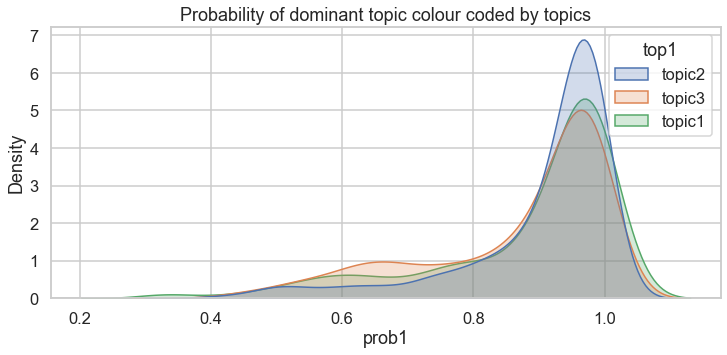

In [116]:
# Now, let’s visualise the probability distribution for the most dominant topic. Ideally, we prefer if most probabilities are centered around higher value.
plt.figure(figsize=(12,5))
sns.kdeplot(data=train, x='prob1', hue='top1', shade=True, common_norm=False)
plt.title('Probability of dominant topic colour coded by topics')

In [117]:
# Great to see that majority of the values are close to 1. Let’s inspect the summary stats for the probability values:
train[["prob1", "prob2", "prob3"]].describe()
# Median probability for the most dominant topic is 0.9466. That’s awesome!

,prob1,prob2,prob3
count,1578.000000,1578.000000,1578.000000
mean,0.883754,0.088462,0.027784
std,0.137735,0.117179,0.039236
min,0.333333,0.000125,0.000121
25%,0.835949,0.011117,0.007946
50%,0.946636,0.029063,0.015438
75%,0.978931,0.120724,0.029404
max,0.999754,0.498559,0.333333


### Topic contextualization

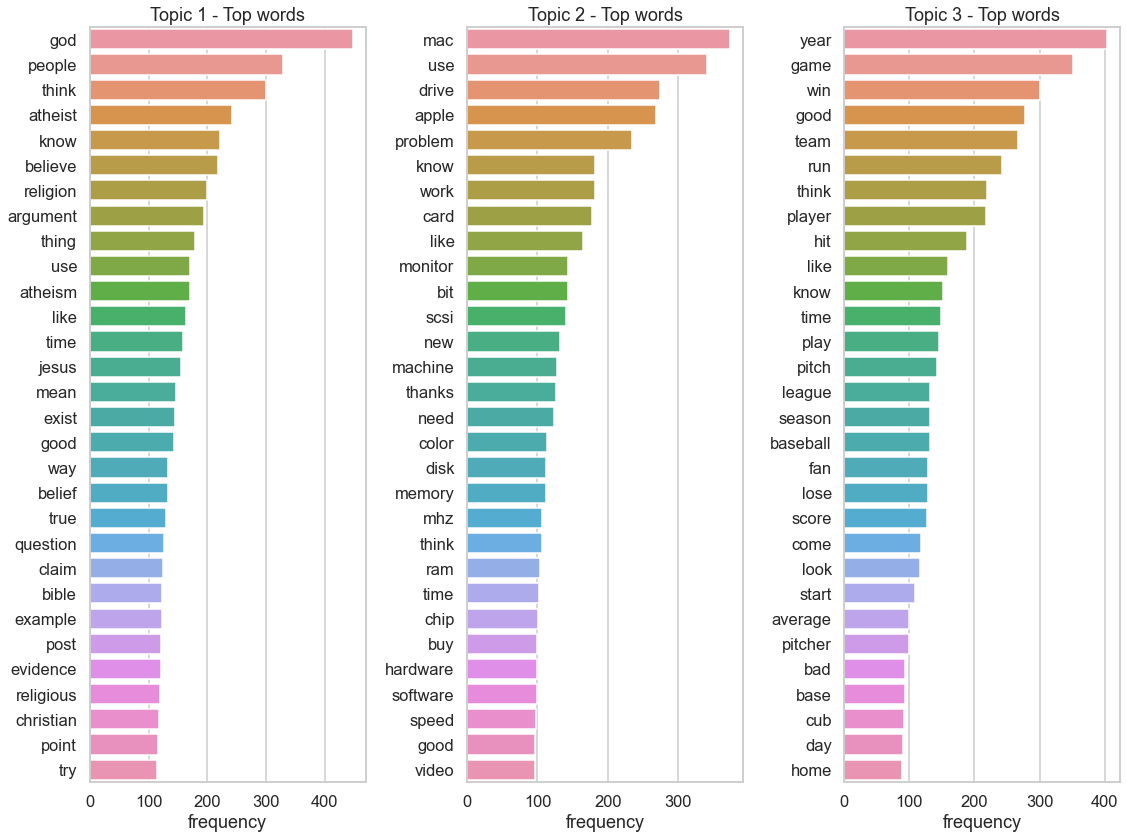

In [119]:
# Now, let’s find the top words per topic to understand topics discovered:
def inspect_term_frequency(corpus, n=30):
    """Show top n frequent terms in corpus."""
    # Preprocess text
    tokens = [preprocess_text(document, stop_words) for document in corpus]
    corpus = [id2word.doc2bow(document) for document in tokens]
    
    # Find term frequencies
    frequency = defaultdict(lambda: 0)
    for document in corpus:
        for codeframe, count in document:
            frequency[codeframe] += count        
    frequency_list = [(codeframe, count) for codeframe, count in frequency.items()]
    frequency_list.sort(key=lambda x: x[1], reverse=True)
    codeframe_lookup = {value:key for key, value in id2word.token2id.items()}
    data = {codeframe_lookup[codeframe]: count for codeframe, count in frequency_list[:n]}
    return pd.DataFrame(pd.Series(data), columns=['frequency'])
    
fig, ax = plt.subplots(1, 3, figsize=(16,12))
for i in range(num_topics):
    topic = 'topic' + str(i+1)
    topic_df = train.loc[train['top1']==topic, 'document']
    frequency = inspect_term_frequency(topic_df)
    sns.barplot(data=frequency, x='frequency', y=frequency.index, ax=ax[i])
    ax[i].set_title(f"Topic {i+1} - Top words")
    
plt.tight_layout()

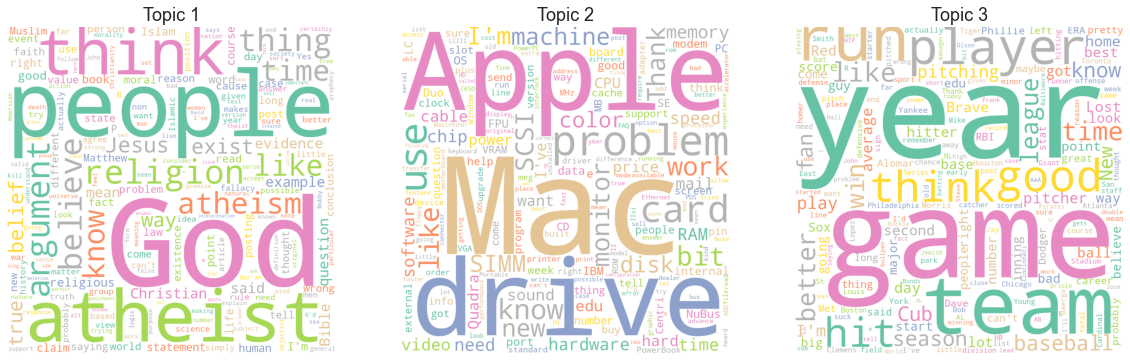

In [120]:
# Let’s also look at word clouds per topic:
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
for i in range(num_topics):
    topic = 'topic' + str(i+1)
    text = ' '.join(train.loc[train['top1']==topic, 'document'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"Topic {i+1}")
    # No axis details
    ax[i].axis("off");

In [121]:
# We can also use pyLDAvis package to visualise the topics interactively:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002717 -0.174817       1        1  38.790508
2     -0.172857  0.085331       2        1  31.655115
1      0.170140  0.089486       3        1  29.554377, topic_info=      Term        Freq       Total Category  logprob  loglift
104    mac  369.000000  369.000000  Default  30.0000  30.0000
568    god  446.000000  446.000000  Default  29.0000  29.0000
27    game  365.000000  365.000000  Default  28.0000  28.0000
255  apple  262.000000  262.000000  Default  27.0000  27.0000
353   team  264.000000  264.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
9     know  178.672739  537.823481   Topic3  -4.8212   0.1170
102   like  158.182751  472.578745   Topic3  -4.9430   0.1245
129   want   96.562358  218.448601   Topic3  -5.4366   0.4026
83    time   97.462476  397.433589   Topic3  -5.4273  -0.1866
125  think   98.323446  604.850697   Topic3  -5.4185  -0.5978

[202 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1240      3  0.976470   adapter
304       2  0.986541    alomar
255       1  0.003814     apple
255       3  0.991684     apple
650       1  0.932121  argument
...     ...       ...       ...
301       3  0.698474      work
1637      2  0.977923    yankee
34        1  0.091492      year
34        2  0.833594      year
34        3  0.075227      year

[315 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### Topic Assignment

In [123]:
topic_mapping = {'topic1': 'atheism', 
                 'topic2': 'mac', 
                 'topic3': 'baseball'}

def assign_topic(document):
    """Assign topic to a document using lda model prediction."""
    probabilities = np.array(add_probabilities(document))
    topic = 'topic' + str(probabilities.argmax()+1)
    return topic_mapping[topic]
    
train['topic'] = train['top1'].map(topic_mapping)
train[['document', 'topic']].head()

,document,topic
1434,"Hello all,\n\nIf anyone knows of a place to ge...",mac
425,\nSomeone in SABR actually looked at these gam...,baseball
1237,\n\n\nSame in Sweden (the ergonomic keyboard i...,mac
847,"\nActually, it is simple.\n\nA person P has co...",atheism
79,Hi!\n\n I'm looking into buying a serial por...,mac


* It’s hard to assess how well the model is doing from just looking at the head of the data
* Let’s look at a few training examples closely and see how accurate the topic assignments are:

In [124]:
for i, document in enumerate(X_train.sample(3, random_state=2).values):
    print(f"********** Train example {i+1} **********")
    print(document, '\n')
    print(f"Assigned topic: {assign_topic(document)}", '\n')

********** Train example 1 **********

Welcome aboard!


(I think you just answered your own question, there)


Most responses were against his postings that spouted the fact that
all atheists are fools/evil for not seeing how peachy Islam is.
I would leave the pro/con arguments of Islam to Fred Rice, who is more
level headed and seems to know more on the subject, anyway.


How did you know I was going to welcome you abord?!?
 

Assigned topic: atheism 

********** Train example 2 **********

As of last week, Mac's Place had the Applied Engineering QuickSilver card
(32k cache, one PDS slot, socket for FPU) on sale for $99.00 (without FPU).
Regular price is $199.

No idea if this is still going on, but I can get the phone no. if anyone is
interested (I found their ad in MacUser). 

Assigned topic: mac 

********** Train example 3 **********
A little delayed, but in the interests of fairness (stats from Elias);
        BA    OBP   SLG  R  HR RBI RNI  %   outs
Alomar .310  .405  .427 105 

In [125]:
# Having a dataframe with the topic assignments
test = pd.DataFrame(X_test)
test[columns] = X_test.apply(add_probabilities).tolist()
test['topic'] = test.loc[:, 'topic1':'topic3'].idxmax(axis=1)\
                    .map(topic_mapping)
test.head()

,document,topic1,topic2,topic3,topic
1361,\n\n\nIt clearly depends on the type of questi...,0.435145,0.555590,0.009265,mac
685,the\nboot\nreboots\n\nThis problem is usually ...,0.030762,0.936250,0.032988,mac
595,\nPerhaps it's time to start rec.sport.basebal...,0.369794,0.034532,0.595675,baseball
1188,\nI have a Lightening Scan Pro 256 hand scanne...,0.011349,0.978417,0.010234,mac
656,"\n\n\tCannot? Try, will not.\n\n---\n\n ...",0.964382,0.017877,0.017740,atheism
